### Упражнение 1

Выведем формулу второго порядка точности для первой производной $f'(x)$ в точке $x_0$.

Воспользуемся формулой, полученной на лекции: $p^{(1)}(x) = [x_0, x_1]f + [x_0, x_1, x_2]f \sum_0^1 (x-x_i) + ...$. 

Требуется точность второго порядка, сл-но нас интересует сумма 
$[x_0, x_1]f + [x_0, x_1, x_2]f \sum_0^1 (x-x_i) = [x_0, x_1]f + [x_0, x_1, x_2]f ( (x - x_0) + (x - x_1) )$.

Пусть точка, в которой мы хотим найти производную, - $x_d$. Тогда в нашем случае $x_0 = x_d - h / \alpha$, $x_1 = x_d$, $x_2 = x_d + \alpha h$.

Преобразуем сумму $[x_0, x_1]f + [x_0, x_1, x_2]f ( (x - x_0) + (x - x_1) )$. 

$[x_0, x_1]f = \frac{f(x_1) - f(x_0)}{x_1 - x_0}$

$[x_0, x_1, x_2]f = \frac{[x_0, x_2]f - [x_0, x_1]f}{x_2 - x_1} = 
\frac{\frac{f(x_2) - f(x_0)}{x_2 - x_0} - \frac{f(x_1) - f(x_0)}{x_1 - x_0}}{x_2 - x_1}$

$[x_0, x_1]f + [x_0, x_1, x_2]f ( (x - x_0) + (x - x_1) ) = 
\frac{f(x_1) - f(x_0)}{x_1 - x_0} + \frac{\frac{f(x_2) - f(x_0)}{x_2 - x_0} - \frac{f(x_1) - f(x_0)}{x_1 - x_0}}{x_2 - x_1} ( (x - x_0) + (x - x_1) ) = 
\frac{f(x_1) - f(x_0)}{h / \alpha} + \frac{\frac{f(x_2) - f(x_0)}{\alpha h + h / \alpha} - \frac{f(x_1) - f(x_0)}{h / \alpha}}{\alpha h} ( (x - x_0) + (x - x_1) )
$

Нас интересует $f'(x)$ в точке $x_d = x_1$. Тогда:

$f'(x_d) = \frac{f(x_1) - f(x_0)}{h / \alpha} + \frac{\frac{f(x_2) - f(x_0)}{\alpha h + h / \alpha} - \frac{f(x_1) - f(x_0)}{h / \alpha}}{\alpha h} ( h / \alpha ) = 
\frac{f(x_1) - f(x_0)}{h / \alpha} + (\frac{f(x_2) - f(x_0)}{\alpha^2 h^2 + h^2} - \frac{f(x_1) - f(x_0)}{h^2}) ( h / \alpha ) = 
\alpha \frac{f(x_1) - f(x_0)}{h} + \frac{h / \alpha (f(x_2) - f(x_0))}{\alpha^2 h^2 + h^2} - \frac{h / \alpha (f(x_1) - f(x_0))}{h^2} = 
\alpha \frac{f(x_1) - f(x_0)}{h} + \frac{f(x_2) - f(x_0)}{\alpha^3 h + h \alpha} - \frac{ (f(x_1) - f(x_0))}{h \alpha} = (\alpha - \frac{1}{\alpha}) \frac{f(x_1) - f(x_0)}{h} + \frac{f(x_2) - f(x_0)}{\alpha^3 h + h \alpha} = 
(\alpha - \frac{1}{\alpha}) \frac{f(x_d) - f(x_d - h / \alpha)}{h} + \frac{f(x_d + \alpha h) - f(x_d - h / \alpha)}{\alpha^3 h + h \alpha}$


Построим графики для различных значений $\alpha$ в зависимости от $h \in [10^{-8}; 1]$.



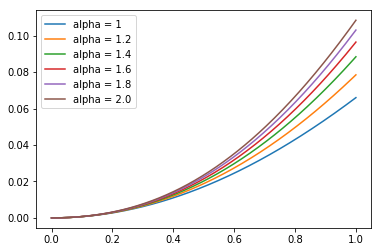

In [13]:
import math
import pylab
import numpy as np

xd = 2

def func(x):
    return np.sin(x)

def d_func(x):
    return np.cos(x)

def d_interpolation_polynom(x, alpha, h):
    x0 = x - h / alpha
    x1 = x
    x2 = x + alpha * h
    return (alpha - 1 / alpha) * (func(x1) - func(x0)) / h + (func(x2) - func(x0)) / (alpha ** 3 * h + h * alpha)
    
shards = 300
alphas = [1, 1.2, 1.4, 1.6, 1.8, 2.0]
ha = 10 ** (-8)
hb = 1

hs = [ha + i * (hb - ha) / (shards - 1) for i in range(0, shards)]

for a in alphas:
    ays = [np.abs(d_func(xd) - d_interpolation_polynom(xd, a, h)) for h in hs]
    pylab.plot(hs, ays)
    
pylab.legend(list(map(lambda a: "alpha = " + str(a), alphas)))    
pylab.show()    

Отчетливо видно, что с ростом $\alpha$ угол наклона графика растёт. Также видно, что для каждого $\alpha$ погрешность убывает при стремлении к 0.

Соотнесем это с теорией. 

Погрешность оценивалась как $|f'(x) - p'(x)| \le \beta || f^3 ||_C \max_i |x - x_i|^2$, где $\beta$ -- какая-то константа. 

$\max_i |x - x_i|$ равна либо $h / \alpha$, либо 0, либо $\alpha h$. 

По условию $\alpha \ge 1 \Rightarrow \alpha^2 \ge 1 \Rightarrow \alpha \ge \frac{1}{\alpha} \Rightarrow \alpha h \ge \frac{h}{\alpha}$. Значит, $|f'(x) - p'(x)| \le \beta (\alpha h)^2$.

Видим, что результат совпадает с теоретическим: при стремлении $h$ к 0 погрешность стремится к 0 (с квадратичной скоростью), с ростом $\alpha$ при фиксированном $h$ погрешность растёт.

### Упражнение 2

### A)

Вычислим значение интеграла. 

$\int \frac{1}{1 + 9x^2} dx = \frac{1}{3} \int_{-1}^5 \frac{1}{1 + t^2} dt = \frac{1}{3} arctg(t) = \frac{1}{3} arctg(3x)$

$I = \int_{-1}^5 \frac{1}{1 + 9x^2} dx = \frac{1}{3} arctg(3x) \Big|_{-1}^5$

Посчитаем это значение:

In [22]:
def func2(x):
    return 1 / (1 + 9 * x ** 2);

def int_func2(x):
    return 1 / 3 * np.arctan(3 * x)

a = -1
b = 5

int_val = int_func(b) - int_func(a)

print(int_val)

0.9177579784724423


Напишем программы, вычисляющие $I$ с помощью составных формул трапеции и Симпсона.

In [18]:
def trapezium_method(f, a, b, M):
    H = (b - a) / M
    ans = (f(a) + f(b)) / 2
    
    for i in range(1, M):
        ans += f(a + i * H)
        
    return ans * H

print(trapezium_method(func2, -1, 5, 800))        
        

0.9177571264695299


In [21]:
def simpson_method(f, a, b, M):
    H = (b - a) / M
    ans = 0
    
    k = 0
    while (k <= M):
        coeff = 1
    
        if (k == 0 or k == M):
            coeff = 1
        elif ((2 * k) % 2 == 0):    
            coeff = 2
        else:
            coeff = 4
            
        ans += coeff * f(a + k * H) 
        k += 0.5
            
    return ans * H / 6

print(simpson_method(func2, -1, 5, 800))  

0.9177579784707307


Видим, что с помощью обеих формул интеграл посчитан правильно с точностью до 6-го знака.

Построим графики погрешностей в зависимости от числа интервалов $M$.

Рассмотрим формулу трапеций при $M \in [1; 40]$.

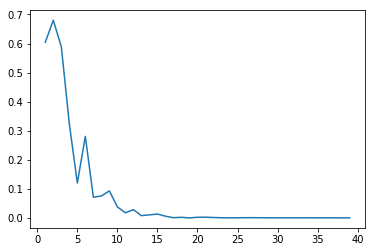

In [39]:
ms = [i for i in range(1, 40)]

ys_trapezium = [np.abs(int_val - trapezium_method(func2, -1, 5, m)) for m in ms]
pylab.plot(ms, ys_trapezium)
pylab.show()


При таком масштабе можем заметить, что погрешность убывает, начиная примерно с 20.

Посмотрим, как ведет себя график на другом промежутке.

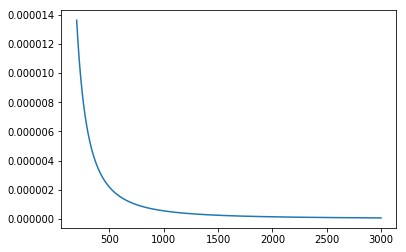

In [40]:
ms = [i for i in range(200, 3000, 2)]

ys_trapezium = [np.abs(int_val - trapezium_method(func2, -1, 5, m)) for m in ms]
pylab.plot(ms, ys_trapezium)
pylab.show()

Взглянув на график, можно предположить, что зависимость гиперболическая.

Сравним с теоретическим значением. 

$|R_T[f]| \le A_2 \frac{b-a}{12} H^2 = A_2 \frac{b-a}{12} \frac{(b-a)^2}{M^2} = \gamma \frac{1}{M^2}$, где $\gamma$ -- неотрицательная константа. То есть, как мы видим, скорость убывания погрешности не превышает $\gamma \frac{1}{M^2}$.

Далее рассмотрим формулу Симпсона.

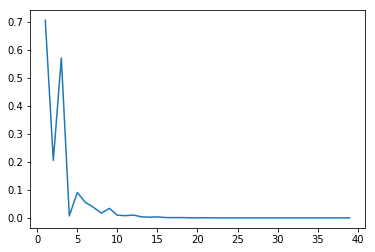

In [43]:
ms = [i for i in range(1, 40)]

ys_simpson = [np.abs(int_val - simpson_method(func2, -1, 5, m)) for m in ms]
pylab.plot(ms, ys_simpson)
pylab.show()

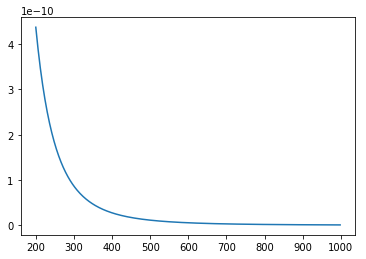

In [44]:
ms = [i for i in range(200, 1000, 2)]

ys_simpson = [np.abs(int_val - simpson_method(func2, -1, 5, m)) for m in ms]
pylab.plot(ms, ys_simpson)
pylab.show()

Исходя из графика, можно сделать такое же предположение. Посмотрим на теоретическое значение.

$|R_S[f]| \le A_4 \frac{b-a}{180} h^4 = A_4 \frac{b-a}{180} \frac{H^4}{2^4} = \theta \frac{1}{M^4}$, где $\theta$ -- неотрицательная константа. То есть, как мы видим, скорость убывания погрешности не превышает $\theta \frac{1}{M^4}$.


### B)

Воспользуемся правилом Рунге для оценки длины шага, необходимого для достижения заданной погрешности.

Пусть $H_2 = H_1 / 2$.
По условию $\varepsilon = 10^{-6}$.

По правилу Рунге: $C \approx \frac{1}{3H^2_2} (S_{H_2}(f) - S_{H_1}(f))$, $|CH^2| \le \varepsilon 
\Rightarrow H \le \sqrt{\frac{\varepsilon}{|C|}}$.

In [59]:
eps = 10 ** (-6)
H1 = 10 ** (-3)
H2 = H1 / 2

def find_step_runge():
    s2 = trapezium_method(func2, -1, 5, int(6 / H2))
    s1 = trapezium_method(func2, -1, 5, int(6 / H1))
    c = (s2 - s1) / (3 * H2 ** 2)
    return np.sqrt(eps / np.abs(c))

runge_step = find_step_runge()
print("Длина шага, полученная с помощью правила Рунге: ")
print(runge_step)

Длина шага, полученная с помощью правила Рунге: 
0.008125290343081414


In [60]:
def find_step_practice():
    M = 1
    
    while True:
        error = np.abs(int_val - trapezium_method(func2, -1, 5, M))
        if (error < eps):
            return 6 / M
            break
        M += 1   
    
    return None

practice_step = find_step_practice()
print("Фактическая длина шага:")
print(practice_step)

Фактическая длина шага:
0.008119079837618403


In [61]:
print("Абсолютная разность между двумя значениями шага:")
print(np.abs(practice_step - runge_step))

Абсолютная разность между двумя значениями шага:
6.210505463011273e-06


Фактическая длина шага получилась чуть меньшей, чем оценка, полученная с помощью правила Рунге, значит, оценка была вычислена верно. При этом разность между двумя полученными значениями не очень большая, значит, оценка довольно точная.

### C)
Вычислим веса для формул Ньютона-Котеса. 


In [81]:
def func_prod(N, i):
    def fun(q):
        res = 1
    
        for k in range(1, N + 1):
            if (k != i):
                res *= q - (k - 1)
        return res
    return fun       

def get_coeff(i, N):
    return (-1) ** (N - i) / math.factorial(i - 1) / math.factorial(N - i)
    
def get_weights(a=-1, b=1, N=2, M=1000):
    h = (b - a) / (N - 1)
    return [get_coeff(i, N) * h * trapezium_method(func_prod(N, i), 0, N-1, M) for i in range(1, N + 1)]
    

In [88]:
def get_first_N_with_neg():
    k = 2
    
    while True:
        min_val = min(get_weights(-1, 1, k, 1000))
        if min_val < 0:
            return k
            break
        k += 1
                      
    return None

print(get_first_N_with_neg())

9


Как видим, для $N = 9$ впервые появляются отрицательные веса. 